**Working with discretized data**

Any computational work on functions of continuous variables relies first on a discretization of these functions, i.e. a choice on how to represent the functions with a finite number of variables. For a function of a single real number $f(x)$, the simplest way to do this is to choose a set of $N$ points $x_i$ ($i=0,1,2,...,N-1$) and store the values $f(x_i)$.

Let us start with a simple example. Take

$f(x) = 2\cos{(x^2)}-1$

defined over the range $x\in [-1,1]$ and 

$x_i = -1 + 2\frac{i+0.5}{N}$.

Construct numpy arrays $f_N$ containing the values $f(x_i)$ for $N=2,5,10,100,1000$, as well as numpy arrays $x_N$ containing the coordinates $x_i$ for the same values of $N$. I recommend doing this using python functions generating $x_N$ given $N$ and $f_N$ given $x_N$, rather than manually defining every $x_N$. The numpy function *arange* may also be useful for this.

In [5]:
import numpy


def coordinates(n):
    i = numpy.arange(0, n, 1)
    x = -1 + (2 * (i + 0.5) / n)
    f = 2 * numpy.cos(x ** 2) - 1
    return x, f

x2 = coordinates(2)[0]
f2 = coordinates(2)[1]

x5 = coordinates(5)[0]
f5 = coordinates(5)[1]

x10 = coordinates(10)[0]
f10 = coordinates(10)[1]

x100 = coordinates(100)[0]
f100 = coordinates(100)[1]

x1000 = coordinates(1000)[0]
f1000 = coordinates(1000)[1]

print("N = 2:")
print("x =", x2)
print("f(x) =", f2, "\n")

print("N = 5:")
print("x =", x5)
print("f(x) =", f5, "\n")

print("N = 10:")
print("x =", x10)
print("f(x) =", f10, "\n")

print("N = 100:")
print("x =", x100)
print("f(x) =", f100, "\n")

print("N = 1000:")
print("x =", x1000)
print("f(x) =", f1000, "\n")


N = 2:
x = [-0.5  0.5]
f(x) = [0.93782484 0.93782484] 

N = 5:
x = [-0.8 -0.4  0.   0.4  0.8]
f(x) = [0.60419152 0.97445457 1.         0.97445457 0.60419152] 

N = 10:
x = [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
f(x) = [0.37899687 0.76466572 0.93782484 0.99190547 0.9999     0.9999
 0.99190547 0.93782484 0.76466572 0.37899687] 

N = 100:
x = [-0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 -0.83 -0.81 -0.79 -0.77
 -0.75 -0.73 -0.71 -0.69 -0.67 -0.65 -0.63 -0.61 -0.59 -0.57 -0.55 -0.53
 -0.51 -0.49 -0.47 -0.45 -0.43 -0.41 -0.39 -0.37 -0.35 -0.33 -0.31 -0.29
 -0.27 -0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05
 -0.03 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19
  0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43
  0.45  0.47  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67
  0.69  0.71  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91
  0.93  0.95  0.97  0.99]
f(x) = [0.11387899 0.17812197 0.239

Plot $f_N$ against $x_N$ for each $N$ used in the previous section. Make sure to label your axis and provide a clear legend for your plot.

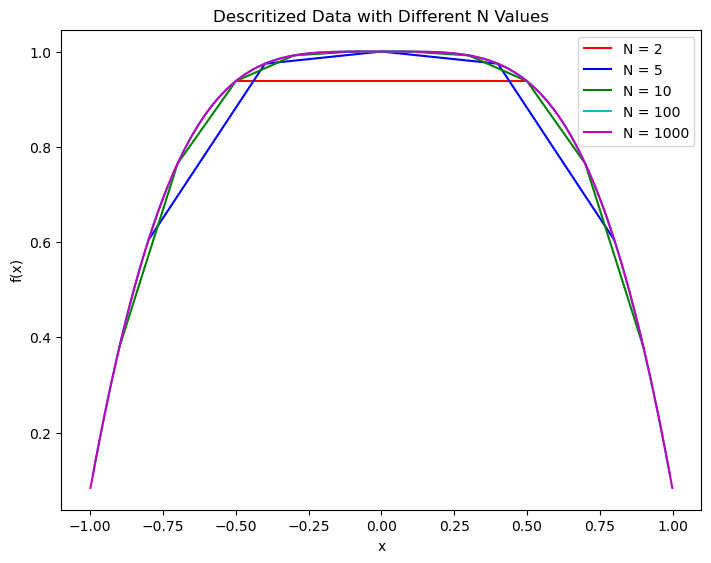

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
axes.set_title('Descritized Data with Different N Values')
axes.set_xlabel('x')
axes.set_ylabel('f(x)')

axes.plot(x2, f2, 'r', label="N = 2")
axes.plot(x5, f5, 'b', label="N = 5")
axes.plot(x10, f10, 'g', label="N = 10")
axes.plot(x100, f100, 'c', label="N = 100")
axes.plot(x1000, f1000, 'm', label="N = 1000")

axes.legend()


**Interpolation from discretized data**

Let us now imagine that we do not know the true form of $f(x)$, and instead only have access to the discretized data. This is typically the case in real computational problems, e.g. if we evolve the values $f(x_i)$ over time without knowing a priori what $f(x,t)$ is. We would like to estimate $f(x)$ for any real input $x$.

*Method 1*

Write a function that first find the value of $i$ such that $x_i\leq x < x_{i+1}$. Do this by looping over the array $x_N$, NOT using the known analytical values of $x_N$. The function should then calculate $f(x)$ using linear interpolation between $f(x_i)$ and $f(x_{i+1})$.

*Method 2*

Write a function performing the same operation, but using the premade function *interpolate.interp1d* from scipy, and cubic interpolation (see Maurik Holtrop's notebook on Basic Calculus for a discussion of that function).

Once you have implemented both functions, use them to estimate $f(\pi/4)$ with both Method 1 and Method 2 and for all values of $N$, and compare to the true answer for the original function $f(x)$. Why is this not working for $N=2$?

In [13]:
import math
from scipy import interpolate

def manual_interp(x, xn, fn):
    for i in range(0, len(xn)):
        if xn[i] <= x < xn[i + 1]:
            fx = fn[i] + ((x - xn[i]) * (fn[i + 1] - fn[i]) / (xn[i + 1] - xn[i]))
            return fx
        else:
            continue

x = math.pi / 4

interp_5 = interpolate.interp1d(x5, f5, kind="cubic")

print("N = 5:")
print("Method 1:", manual_interp(x, x5, f5))
print("Method 2:", interp_5(x), "\n")

interp_10 = interpolate.interp1d(x10, f10, kind="cubic")

print("N = 10:")
print("Method 1:", manual_interp(x, x10, f10))
print("Method 2:", interp_10(x), "\n")

interp_100 = interpolate.interp1d(x100, f100, kind="cubic")

print("N = 100:")
print("Method 1:", manual_interp(x, x100, f100))
print("Method 2:", interp_100(x), "\n")

interp_1000 = interpolate.interp1d(x1000, f1000, kind="cubic")

print("N = 1000:")
print("Method 1:", manual_interp(x, x1000, f1000))
print("Method 2:", interp_1000(x), "\n")

interp_2 = interpolate.interp1d(x2, f2, kind="cubic")

print("N = 2:")
print("Method 1:", manual_interp(x, x2, f2))
print("Method 2:", interp_2(x))

# N = 2 doesn't work because there are only two points to choose from; x(i + 1) doesn't exist

N = 5:
Method 1: 0.6177078171946131
Method 2: 0.6288394935174271 

N = 10:
Method 1: 0.5999886593099735
Method 2: 0.6316292567132666 

N = 100:
Method 1: 0.631185838948997
Method 2: 0.6314090302919676 

N = 1000:
Method 1: 0.6314070118990829
Method 2: 0.6314090348435947 



ValueError: The number of derivatives at boundaries does not match: expected 2, got 0+0

**Inverse of a function**

Assume that you are given $x_N$ and $f_N$ for $N=100$, as calculated above. Used the *interpolate.interp1d* function and your plots of $f(x)$ to estimate the value(s) of $x$ for which $f(x)=0.32$ (see the Basic Calculus notebook for a discussion of how to do this).

In [15]:
arg_max = numpy.argmax(f100)

inv1 = interpolate.interp1d(f100[0:arg_max], x100[0:arg_max], kind="cubic")
inv2 = interpolate.interp1d(f100[arg_max + 1:100], x100[arg_max + 1:100], kind="cubic")

print(f"f(x) = 0.32 for x = {inv1(0.32)}, x = {inv2(0.32)}")

f(x) = 0.32 for x = -0.9219423815601173, x = 0.9219423815601175


**Derivative of a discretized function**

We would now like to estimate $f'=df/dx$. This is a fairly common necessity when solving physics problems computationally, e.g. when evolving ODEs/PDEs.
A simple approximation to $f'(x_i)$ is

$f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$

Write a function that returns numpy array $f'_N$, given the arrays $f_N$ and $x_N$ from the previous problems. What is a reasonable thing to do to deal with the end points $i=0$ and $i=N-1$?

Plot your results for $f'_N$ for all values of $N$ used so far, and compare with the exact result for $f'(x)$.

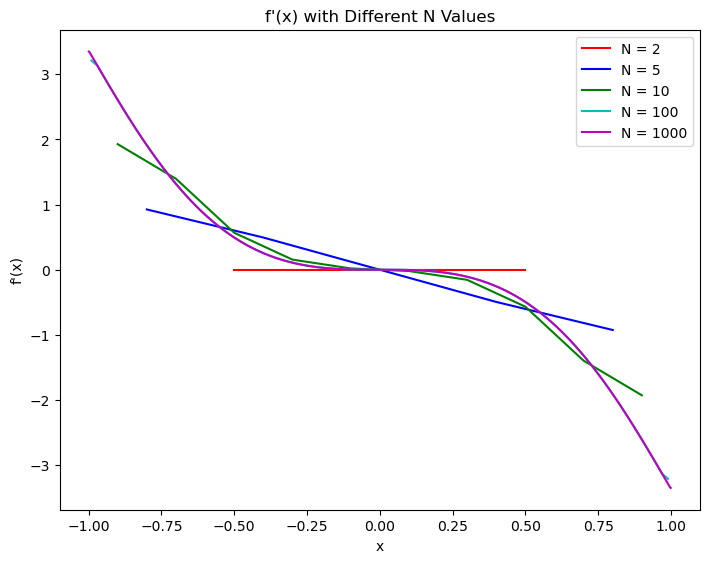

In [19]:
def deriv(x, f):
    f_prime = numpy.empty(len(f))
    for i in range(1, len(f) - 1):
        f_prime[i] = (f[i + 1] - f[i - 1]) / (x[i + 1] - x[i - 1])
    f_prime[0] = (f[1] - f[0]) / (x[1] - x[0]) # use one-sided derivative for endpoints
    f_prime[len(f) - 1] = (f[len(f) - 1] - f[len(f) - 2]) / (x[len(x) - 1] - x[len(x) - 2])
    return f_prime

f2_prime = deriv(x2, f2)
f5_prime = deriv(x5, f5)
f10_prime = deriv(x10, f10)
f100_prime = deriv(x100, f100)
f1000_prime = deriv(x1000, f1000)

fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
axes.set_title("f'(x) with Different N Values")
axes.set_xlabel("x")
axes.set_ylabel("f'(x)")

axes.plot(x2, f2_prime, 'r', label="N = 2")
axes.plot(x5, f5_prime, 'b', label="N = 5")
axes.plot(x10, f10_prime, 'g', label="N = 10")
axes.plot(x100, f100_prime, 'c', label="N = 100")
axes.plot(x1000, f1000_prime, 'm', label="N = 1000")

axes.legend()

**Integral of a discretized function**

Now, let us estimate

$I = \int_0^1 dx f(x)$

As for interpolation, you will first use your own implementation of an integration routine, then use python's built-in functions.

*Method 1*

Write a function that takes as input the numpy arrays $x_N$ and $f_N$, and returns $I$ calculated using the trapezoidal rule. For this part, you are only allowed to use loops and algebraic functions, not any of python's built-in functions. What is a reasonable thing to do to deal with the end points?

*Method 2*

Now, write a function performing the same calculation using the built-in *integrate.cumtrapz* from scipy.

In [33]:
from scipy import integrate

def manual_integ(x, f):
    h = x[1] - x[0]
    a = 0
    for i in range(0, len(f) - 1):
        a += 0.5 * h * (f[i] + f[i + 1]) # I from -1 to 1
    return a/2 # I from 0 to 1

def integ(x, f):
    a = integrate.cumulative_trapezoid(f, x)[len(f) - 2]
    return a/2

print(manual_integ(x100, f100))
print(integ(x100, f100))

0.8079657840771558
0.8079657840771551
